# Class Objects

When a class definition is entered, a new namespace is created, and used as the local scope -- thus, all assignments to local variables go into this new namespace. In particular, function definitions bind the name of the new function here.  

When a class definition is left normally (via the end), a *class object* is created. Class objects support two kinds of operations: attribute references and instantiation. When a class defines an **\_\_init\_\_()** method, class instantiation automatically invokes **\_\_init\_\_()** for the newly created class instance.

# Instance Objects

- *data attributes*: Data attributes need not to be declared, like local variables, they spring into existence when they are first assigned to.
- *method*: Valid method names of an instance object depend on its class.

In [4]:
a = 3
isinstance(a, int) # check an instance's type

True

In [22]:
type(a)

int

# Class and Instance Variables
Generally speaking, **instance variables** are for data unique to each instance and **class variables** are for attributes and methods shared by all instance of the class.

In [16]:
class Dog:
    tricks = []
    
    def __init__(self, name):
        self.name = name
        
    def add_trick(self, trick):
        self.tricks.append(trick)

In [17]:
d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')
d.tricks

['roll over', 'play dead']

If the same attribute name occurs in both an instance and in a class, then attribute lookup prioritizes the instance.

In [18]:
class Dog:
    tricks = []
    
    def __init__(self, name):
        self.name = name
        self.tricks = []
        
    def add_trick(self, trick):
        self.tricks.append(trick)

In [20]:
d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')
d.tricks

['roll over']

In [21]:
Dog.tricks

[]

# Inheritance

Attribute/Method references are resolved as follows: the corresponding class attribute is searched, descending down the chain of base classes if necessary.  

Derived classes may override methods of their base classes. A method of a base class that calls another method defined in the same base class may end up calling a method of a derived class that overrides it.  

There is a simple way to call the base class method directly: just call **BaseClassName.methodname(self, arguments)**.(Note that this only works if the base class is accessible as **BaseClassName** in the global scope.

## Multiple Inheritance

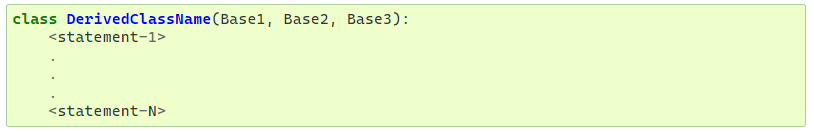
You can think of the search for attributes inherited from a parent class as depth-first, left-to-right, not searching twice in the same class where there is an overlap in the hierarchy. Thus, if an attribute is not found in **DerivedClassName**, it is searched for in **Base1**, then (recursively) in the base classes of **Base1**, and if it was not found there, it was searched for in **Base2**, and so on.

In [2]:
issubclass(bool, int) # check class inheritance

True

# Private variables

“Private” instance variables that cannot be accessed except from inside an object don’t exist in Python. However, there is a convention that is followed by most Python code: a name prefixed with an underscore (e.g. \_spam) should be treated as a non-public part of the API (whether it is a function, a method or a data member).  

Since there is a valid use-case for class-private members (namely to avoid name clashes of names with names defined by subclasses), there is limited support for such a mechanism, called name mangling. Any identifier of the form \_\_spam (at least two leading underscores, at most one trailing underscore) is textually replaced with \_classname\_\_spam, where classname is the current class name with leading underscore(s) stripped. This mangling is done without regard to the syntactic position of the identifier, as long as it occurs within the definition of a class.

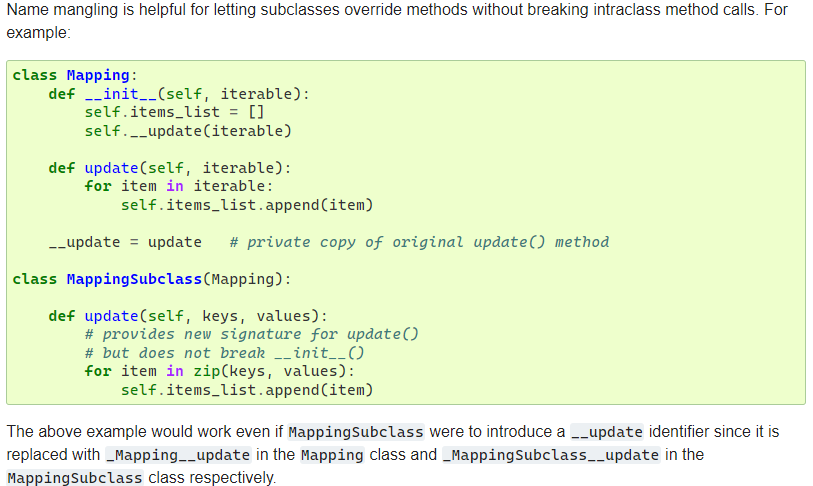

# Other

###  Duck typing (Dynamic typing)
A piece of Python code that expects a particular abstract data type can often be passes a class that emulates the methods of that data type instead.